In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from torchvision.transforms import functional as TF

from wiring_efficiency_utils import *
from neuralsheet import *

%load_ext autoreload
%autoreload 2

In [977]:
# Example usage
crop_size = 32  # Crop size (NxN)
batch_size = 32  # Number of crops to load at once
num_workers = 4  # Number of threads for data loading
root_dir = './imagenet_mini'  # Path to your image folder
device = 'cuda'  # Assuming CUDA is available and desired
M = 32  # Neural sheet dimensions
std_e = 1  # Standard deviation for excitation Gaussian
epochs = 1
lr = 0.1

dataloader = create_dataloader(root_dir, crop_size, batch_size, num_workers)
model = NeuralSheet(M, crop_size, std_e, device=device).to(device)

In [978]:
# Looping over the DataLoader

for e in range(epochs):
    
    batch_progress = tqdm(dataloader, leave=False)
    for batch in batch_progress:
        batch = batch.to('cuda')  # Transfer the entire batch to GPU
        for image in batch:
            
            if image.sum():
                
                model(image[None])
                model.hebbian_step()
            
        mean_activation = model.mean_activations.mean()
        batch_progress.set_description('Mean acts: {:.3f}'.format(mean_activation))
        

KeyboardInterrupt: 

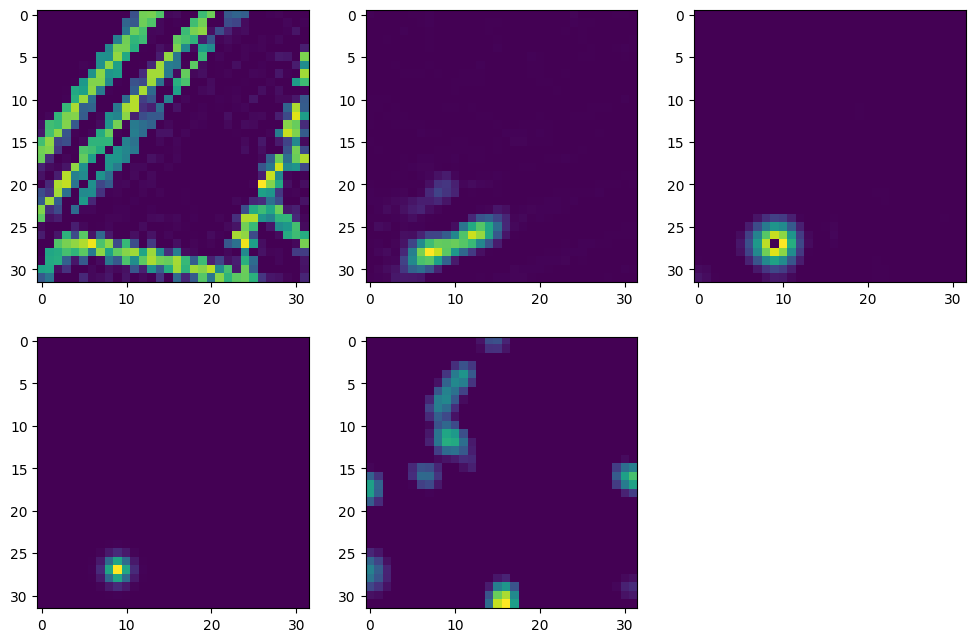

In [986]:
def show_map(model):
    
    plt.figure(figsize=(12,12))
    
    random_sample = random.randint(0,model.afferent_weights.shape[0]-1)
    random_batch = random.randint(0,batch.shape[0]-1)
    
    model(batch[random_batch][None])
    
    plt.subplot(3,3,1)
    plt.imshow(model.current_input[0,0].detach().cpu())
    plt.subplot(3,3,2)
    plt.imshow(model.afferent_weights[random_sample,0].detach().cpu())
    plt.subplot(3,3,3)
    plt.imshow((model.lateral_correlations*model.masks)[random_sample,0].detach().cpu())
    plt.subplot(3,3,4)
    plt.imshow((model.lateral_weights_exc)[random_sample,0].detach().cpu())
    plt.subplot(3,3,5)
    plt.imshow((model.current_response*model.masks)[random_sample,0].detach().cpu())

    plt.show()
    
show_map(model)